In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '06a_LAB_Pandas_TimeSeries.ipynb',
 '06b_LAB_Decomposition.ipynb',
 '06c_DEMO_Stationarity.ipynb',
 '06d_DEMO_Smoothing.ipynb',
 '06e_DEMO_ARMA.ipynb',
 '06f_DEMO_SARIMA_Prophet.ipynb',
 '06g_DEMO_Deep_Learning.ipynb',
 '06h_DEMO_Survival.ipynb',
 'data',
 'Time Series Peer Graded.ipynb',
 'TimeSeries_PeerGraded.docx']

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [4]:
filepath = "data\co2-ppm-mauna-loa-19651980.csv"
df = pd.read_csv(filepath)
df

,Month,"CO2 (ppm) mauna loa, 1965-1980"
0,1965-01,319.32
1,1965-02,320.36
2,1965-03,320.82
3,1965-04,322.06
4,1965-05,322.17
...,...,...
188,1980-09,335.49
189,1980-10,336.63
190,1980-11,337.74
191,1980-12,338.36


In [5]:
df = df[:192]
df

,Month,"CO2 (ppm) mauna loa, 1965-1980"
0,1965-01,319.32
1,1965-02,320.36
2,1965-03,320.82
3,1965-04,322.06
4,1965-05,322.17
...,...,...
187,1980-08,337.19
188,1980-09,335.49
189,1980-10,336.63
190,1980-11,337.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           192 non-null    object
 1   CO2 (ppm) mauna loa, 1965-1980  192 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [7]:
df['CO2 (ppm) mauna loa, 1965-1980'] = df['CO2 (ppm) mauna loa, 1965-1980'].astype(float)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Month                           192 non-null    datetime64[ns]
 1   CO2 (ppm) mauna loa, 1965-1980  192 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


C:\Users\WeiEn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\WeiEn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df

,Month,"CO2 (ppm) mauna loa, 1965-1980"
0,1965-01-01,319.32
1,1965-02-01,320.36
2,1965-03-01,320.82
3,1965-04-01,322.06
4,1965-05-01,322.17
...,...,...
187,1980-08-01,337.19
188,1980-09-01,335.49
189,1980-10-01,336.63
190,1980-11-01,337.74


In [9]:
def run_sequence_plot (x, y, title, xlabel='time', ylabel='series'):
    plt.figure(figsize=(10,10))
    plt.plot(x,y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.tight_layout()

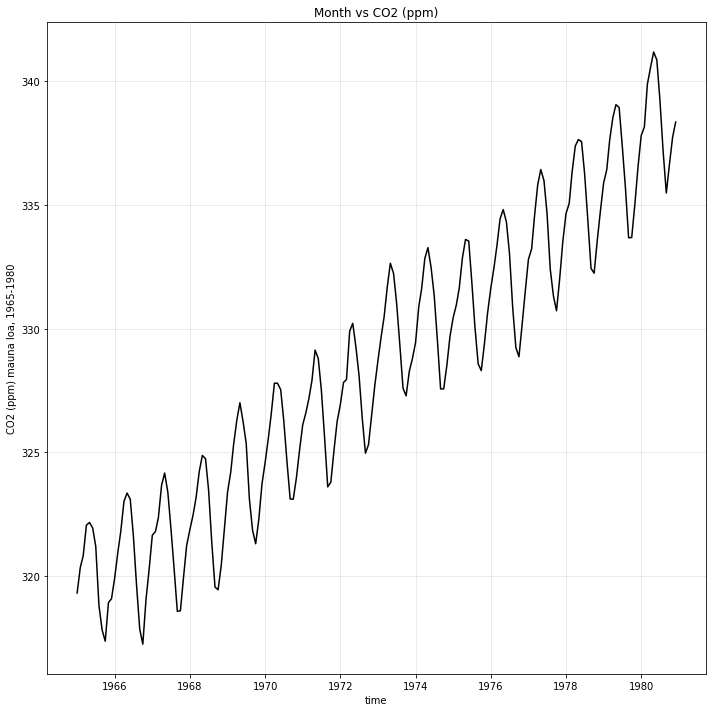

In [10]:
run_sequence_plot(df['Month'], df['CO2 (ppm) mauna loa, 1965-1980'], title='Month vs CO2 (ppm)', ylabel='CO2 (ppm) mauna loa, 1965-1980')

In [11]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['CO2 (ppm) mauna loa, 1965-1980'])
print('ADF: ', adf)
print('p-value: ', pvalue)
print('crit values: ', critical_values)

ADF:  1.2696771490032273
p-value:  0.9964336403294772
crit values:  {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=df['CO2 (ppm) mauna loa, 1965-1980'], model='addictive', period=24)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residue = ss_decomposition.resid

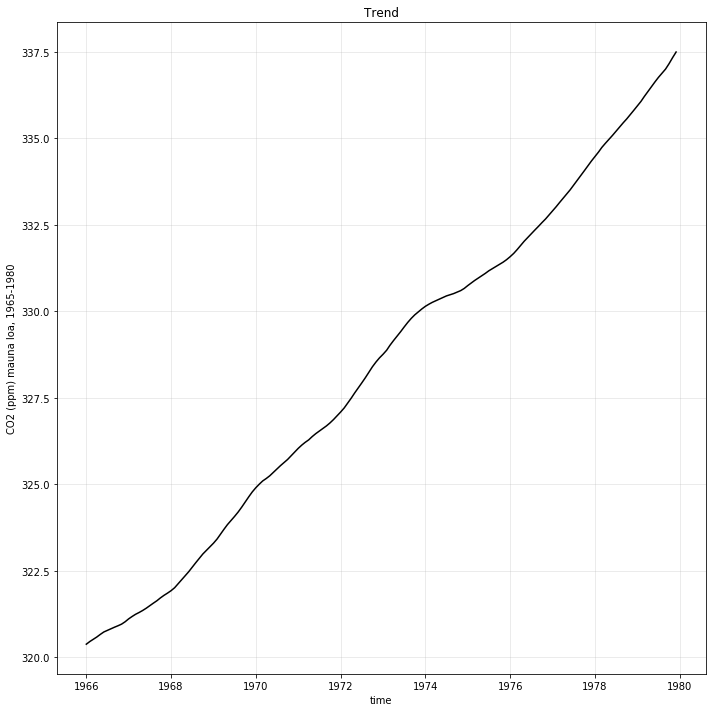

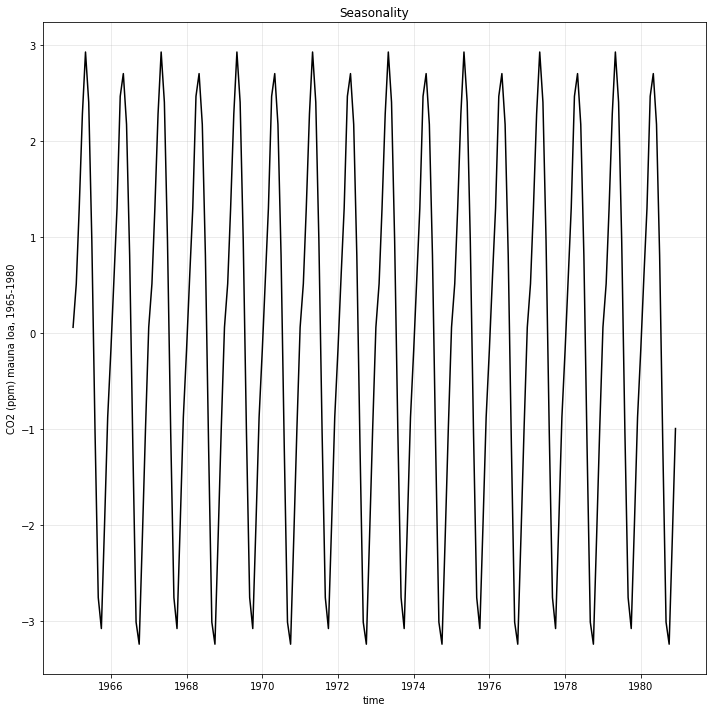

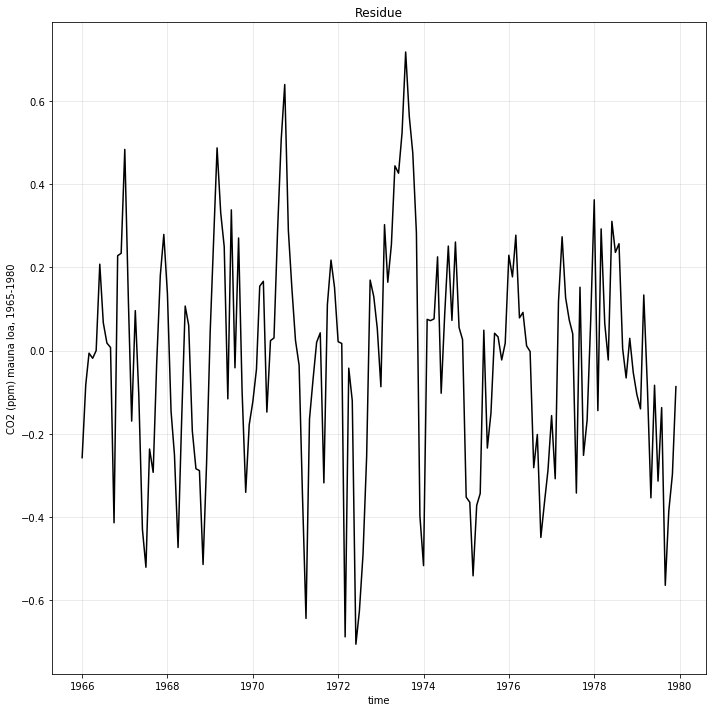

In [13]:
run_sequence_plot(df['Month'], est_trend, title='Trend', ylabel='CO2 (ppm) mauna loa, 1965-1980')
plt.show()
run_sequence_plot(df['Month'], est_seasonal, title='Seasonality', ylabel='CO2 (ppm) mauna loa, 1965-1980')
plt.show()
run_sequence_plot(df['Month'], est_residue, title='Residue', ylabel='CO2 (ppm) mauna loa, 1965-1980')
plt.show()

In [14]:
df.shape

(192, 2)

In [57]:
pd.set_option('display.max_rows', None)
df['CO2 (ppm) mauna loa, 1965-1980'].value_counts()

327.57    2
323.12    2
321.81    2
327.80    2
321.65    2
323.11    2
329.69    2
336.44    2
331.63    2
328.53    1
329.41    1
318.60    1
323.67    1
322.06    1
319.94    1
325.09    1
326.24    1
332.46    1
330.97    1
321.31    1
330.73    1
339.25    1
320.26    1
332.05    1
327.54    1
323.40    1
330.45    1
326.39    1
332.87    1
330.05    1
329.14    1
333.68    1
328.73    1
336.33    1
334.39    1
324.60    1
327.95    1
326.54    1
325.33    1
319.06    1
323.17    1
337.81    1
323.47    1
337.63    1
337.65    1
333.23    1
328.28    1
321.93    1
318.58    1
322.17    1
328.58    1
324.63    1
332.65    1
320.36    1
319.64    1
335.05    1
323.36    1
340.87    1
327.71    1
322.36    1
332.85    1
318.93    1
319.32    1
337.39    1
331.69    1
336.53    1
327.29    1
330.18    1
328.11    1
331.50    1
334.76    1
337.57    1
325.32    1
320.29    1
321.25    1
331.32    1
333.61    1
335.07    1
332.41    1
323.39    1
329.53    1
330.87    1
320.45    1
322.

In [170]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape
    [n_samples, time_steps, features]
    """ 
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data (df, series_name, input_hours, 
                        test_hours):
    
    """
    Arguments
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    input_months (int): length of sequence input to network; time_step
    test_months (int): length of held-out terminal sequence; test size
    sample_gap (int): step size between start of train sequence; default is 3
    """
    
    forecast_series = df[series_name].values
    
    train = forecast_series[:-test_hours] #shape is (162,0)
    test = forecast_series[-test_hours:] #shape is (30,)
    
    train_X, train_y = [], []
    
    for i in range (0, train.shape[0]-input_hours):
        train_X.append(train[i:i+input_hours])
        train_y.append(train[i+input_hours])
    
    train_X = get_keras_format_series(train_X)
    train_y = np.array(train_y)
    
    test_X_init = test[:input_hours]
    test_y = test[input_hours:]
    
    return train_X, test_X_init, train_y, test_y

In [224]:
test_months= 100
input_months= 12 #sequence length

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'CO2 (ppm) mauna loa, 1965-1980', 
                         input_months, test_months))

print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (80, 12, 1)
Training output shape: (80,)
Test input shape: (12,)
Test output shape: (88,)


In [189]:
def fit_simpleRNN (train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y
    
    Arguments
    train_X(array): input sequence samples for training
    train_y(list): next step in sequence targets
    cells_units(int): number of hidden units for RNN cells
    epochs(int): number of training epochs
    """
    
    model = Sequential()
    
    model.add(SimpleRNN(cell_units, 
                        input_shape=(train_X.shape[1],1)))
    
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=5, verbose=1)
    
    return model

In [234]:
model = fit_simpleRNN(train_X, train_y, cell_units=100, epochs=5000)

Epoch 1/5000
16/16 [==============================] - 0s 1ms/step - loss: 105973.0437
Epoch 2/5000
16/16 [==============================] - 0s 1ms/step - loss: 104749.3961
Epoch 3/5000
16/16 [==============================] - 0s 1ms/step - loss: 103440.7509
Epoch 4/5000
16/16 [==============================] - 0s 1ms/step - loss: 102296.0965
Epoch 5/5000
16/16 [==============================] - 0s 1ms/step - loss: 101383.6098
Epoch 6/5000
16/16 [==============================] - 0s 1ms/step - loss: 100513.2385
Epoch 7/5000
16/16 [==============================] - 0s 1ms/step - loss: 99364.7537
Epoch 8/5000
16/16 [==============================] - 0s 1ms/step - loss: 97992.9802
Epoch 9/5000
16/16 [==============================] - 0s 1ms/step - loss: 97446.1673
Epoch 10/5000
16/16 [==============================] - 0s 1ms/step - loss: 96483.0616
Epoch 11/5000
16/16 [==============================] - 0s 1ms/step - loss: 95104.8470
Epoch 12/5000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 1ms/step - loss: 7203.3443
Epoch 191/5000
16/16 [==============================] - 0s 1ms/step - loss: 7204.7856
Epoch 192/5000
16/16 [==============================] - 0s 2ms/step - loss: 6888.1218
Epoch 193/5000
16/16 [==============================] - 0s 2ms/step - loss: 6820.4814
Epoch 194/5000
16/16 [==============================] - 0s 3ms/step - loss: 6618.7691
Epoch 195/5000
16/16 [==============================] - 0s 3ms/step - loss: 6506.7255
Epoch 196/5000
16/16 [==============================] - 0s 2ms/step - loss: 6315.8446
Epoch 197/5000
16/16 [==============================] - 0s 1ms/step - loss: 6216.7993
Epoch 198/5000
16/16 [==============================] - 0s 1ms/step - loss: 6036.2762
Epoch 199/5000
16/16 [==============================] - ETA: 0s - loss: 5924.31 - 0s 1ms/step - loss: 5908.6947
Epoch 200/5000
16/16 [==============================] - 0s 1ms/step - loss: 5931.9157
Epoch 201/5000
16/16 [=====================

16/16 [==============================] - 0s 1ms/step - loss: 9.5486
Epoch 383/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.5436
Epoch 384/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.5892
Epoch 385/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6732
Epoch 386/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2943
Epoch 387/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5809
Epoch 388/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.0227
Epoch 389/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8205
Epoch 390/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.7892
Epoch 391/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9316
Epoch 392/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8695
Epoch 393/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8148
Epoch 394/5000


16/16 [==============================] - 0s 1ms/step - loss: 9.7790
Epoch 579/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.0200
Epoch 580/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3309
Epoch 581/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2366
Epoch 582/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8786
Epoch 583/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2434
Epoch 584/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5566
Epoch 585/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.3156
Epoch 586/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9387
Epoch 587/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9745
Epoch 588/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9409
Epoch 589/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2821
Epoch 590/5000
16/

16/16 [==============================] - 0s 1ms/step - loss: 10.6114
Epoch 775/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0548
Epoch 776/5000
16/16 [==============================] - ETA: 0s - loss: 22.42 - 0s 1ms/step - loss: 11.9328
Epoch 777/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5970
Epoch 778/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8170
Epoch 779/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.7322
Epoch 780/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9197
Epoch 781/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.7384
Epoch 782/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.3895
Epoch 783/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1382
Epoch 784/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.7186
Epoch 785/5000
16/16 [==============================] - 0s 1ms/step - loss

16/16 [==============================] - 0s 1ms/step - loss: 7.9574
Epoch 971/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1671
Epoch 972/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6825
Epoch 973/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5446
Epoch 974/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3215
Epoch 975/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.2561
Epoch 976/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1894
Epoch 977/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6331
Epoch 978/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0533
Epoch 979/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.3923
Epoch 980/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.4853
Epoch 981/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1909
Epoch 982/5000
16

16/16 [==============================] - 0s 1ms/step - loss: 10.1905
Epoch 1165/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8960
Epoch 1166/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6877
Epoch 1167/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9296
Epoch 1168/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.5834
Epoch 1169/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.1153
Epoch 1170/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5369
Epoch 1171/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.5266
Epoch 1172/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8522
Epoch 1173/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4959
Epoch 1174/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1568
Epoch 1175/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9331
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 11.6491
Epoch 1359/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0406
Epoch 1360/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4968
Epoch 1361/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.3620
Epoch 1362/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.6553
Epoch 1363/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4167
Epoch 1364/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6850
Epoch 1365/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.4686
Epoch 1366/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.2150
Epoch 1367/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1890
Epoch 1368/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.2975
Epoch 1369/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0126
Ep

16/16 [==============================] - 0s 1ms/step - loss: 7.6608
Epoch 1553/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.0747
Epoch 1554/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.4266
Epoch 1555/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.2564
Epoch 1556/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9102
Epoch 1557/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.5077
Epoch 1558/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.1898
Epoch 1559/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.6649
Epoch 1560/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3457
Epoch 1561/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6808
Epoch 1562/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0215
Epoch 1563/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5624
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 8.9018
Epoch 1747/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.0510
Epoch 1748/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6125
Epoch 1749/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9600
Epoch 1750/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1908
Epoch 1751/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8934
Epoch 1752/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6001
Epoch 1753/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9420
Epoch 1754/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4228
Epoch 1755/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3040
Epoch 1756/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.4830
Epoch 1757/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9634
Epoch 17

16/16 [==============================] - 0s 1ms/step - loss: 10.3689
Epoch 1941/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.8822
Epoch 1942/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.4645
Epoch 1943/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6261
Epoch 1944/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.5673
Epoch 1945/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.1219
Epoch 1946/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5738
Epoch 1947/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9448
Epoch 1948/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5010
Epoch 1949/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6115
Epoch 1950/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2280
Epoch 1951/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6873
Epo

16/16 [==============================] - 0s 1ms/step - loss: 11.6644
Epoch 2038/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.1941
Epoch 2039/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.7446
Epoch 2040/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6630
Epoch 2041/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.7027
Epoch 2042/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.1753
Epoch 2043/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4869
Epoch 2044/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.7289
Epoch 2045/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.2954
Epoch 2046/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.0954
Epoch 2047/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2650
Epoch 2048/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5606
Epo

16/16 [==============================] - 0s 1ms/step - loss: 10.9643
Epoch 2232/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.8966
Epoch 2233/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9236
Epoch 2234/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.7943
Epoch 2235/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0156
Epoch 2236/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.1132
Epoch 2237/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6672
Epoch 2238/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0317
Epoch 2239/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.1743
Epoch 2240/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0544
Epoch 2241/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0088
Epoch 2242/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4766
Epo

16/16 [==============================] - 0s 1ms/step - loss: 9.4660
Epoch 2329/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.2207
Epoch 2330/5000
16/16 [==============================] - 0s 2ms/step - loss: 8.6426
Epoch 2331/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4351
Epoch 2332/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0113
Epoch 2333/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.7721
Epoch 2334/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9656
Epoch 2335/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.8171
Epoch 2336/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3817
Epoch 2337/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6997
Epoch 2338/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.4004
Epoch 2339/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2097
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 9.1343
Epoch 2523/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6236
Epoch 2524/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4847
Epoch 2525/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4989
Epoch 2526/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6980
Epoch 2527/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5908
Epoch 2528/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5255
Epoch 2529/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8429
Epoch 2530/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.4504
Epoch 2531/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0764
Epoch 2532/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0438
Epoch 2533/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9180
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 8.9619
Epoch 2717/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5127
Epoch 2718/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9139
Epoch 2719/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.3783
Epoch 2720/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8944
Epoch 2721/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8740
Epoch 2722/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5744
Epoch 2723/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.2390
Epoch 2724/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.9192
Epoch 2725/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9982
Epoch 2726/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.1565
Epoch 2727/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0764
Epoch 

16/16 [==============================] - 0s 1ms/step - loss: 8.4195
Epoch 2911/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2938
Epoch 2912/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2801
Epoch 2913/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.4486
Epoch 2914/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.0592
Epoch 2915/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9316
Epoch 2916/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4139
Epoch 2917/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.3850
Epoch 2918/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8010
Epoch 2919/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.1447
Epoch 2920/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.2794
Epoch 2921/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8950
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 8.7396
Epoch 3105/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6662
Epoch 3106/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5351
Epoch 3107/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.8194
Epoch 3108/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9432
Epoch 3109/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.7093
Epoch 3110/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.2109
Epoch 3111/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5360
Epoch 3112/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8151
Epoch 3113/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3267
Epoch 3114/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.5228
Epoch 3115/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8340
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 8.2402
Epoch 3299/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9419
Epoch 3300/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.7271
Epoch 3301/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9351
Epoch 3302/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5812
Epoch 3303/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.4056
Epoch 3304/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5311
Epoch 3305/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.3276
Epoch 3306/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8127
Epoch 3307/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1213
Epoch 3308/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1678
Epoch 3309/5000
16/16 [==============================] - 0s 1ms/step - loss: 6.8833
Epoch 33

16/16 [==============================] - 0s 1ms/step - loss: 10.0772
Epoch 3493/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.7394
Epoch 3494/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1850
Epoch 3495/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.7920
Epoch 3496/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9990
Epoch 3497/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.2345
Epoch 3498/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.0602
Epoch 3499/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.7171
Epoch 3500/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9940
Epoch 3501/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.0391
Epoch 3502/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.0728
Epoch 3503/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1994
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 8.7371
Epoch 3687/5000
16/16 [==============================] - 0s 2ms/step - loss: 9.8467
Epoch 3688/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6918
Epoch 3689/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8777
Epoch 3690/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8558
Epoch 3691/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6267
Epoch 3692/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.7344
Epoch 3693/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.6974
Epoch 3694/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.9165
Epoch 3695/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.6216
Epoch 3696/5000
16/16 [==============================] - 0s 1ms/step - loss: 6.5541
Epoch 3697/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.7260
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 7.2539
Epoch 3881/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.3526
Epoch 3882/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8799
Epoch 3883/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.7624
Epoch 3884/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4783
Epoch 3885/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1002
Epoch 3886/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6368
Epoch 3887/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.2305
Epoch 3888/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.7076
Epoch 3889/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9647
Epoch 3890/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5878
Epoch 3891/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1032
Epoch 38

16/16 [==============================] - 0s 1ms/step - loss: 9.2682
Epoch 4075/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8687
Epoch 4076/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3883
Epoch 4077/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.5081
Epoch 4078/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9224
Epoch 4079/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8745
Epoch 4080/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4680
Epoch 4081/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.0390
Epoch 4082/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.8079
Epoch 4083/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8100
Epoch 4084/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5333
Epoch 4085/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.0692
Epoch 4

16/16 [==============================] - 0s 1ms/step - loss: 9.3082
Epoch 4269/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.6314
Epoch 4270/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.3737
Epoch 4271/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.1949
Epoch 4272/5000
16/16 [==============================] - 0s 1ms/step - loss: 11.4008
Epoch 4273/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9730
Epoch 4274/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6948
Epoch 4275/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4759
Epoch 4276/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4066
Epoch 4277/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.5728
Epoch 4278/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9416
Epoch 4279/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.4131
Epoch 4

16/16 [==============================] - 0s 1ms/step - loss: 8.2185
Epoch 4463/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9168
Epoch 4464/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.2839
Epoch 4465/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.7769
Epoch 4466/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9365
Epoch 4467/5000
16/16 [==============================] - 0s 1ms/step - loss: 6.9851
Epoch 4468/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.7384
Epoch 4469/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4918
Epoch 4470/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9241
Epoch 4471/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.8815
Epoch 4472/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4809
Epoch 4473/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.3859
Epoch 4

16/16 [==============================] - 0s 1ms/step - loss: 8.4833
Epoch 4657/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.7214
Epoch 4658/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5048
Epoch 4659/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.0034
Epoch 4660/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.6569
Epoch 4661/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.8751
Epoch 4662/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.9950
Epoch 4663/5000
16/16 [==============================] - 0s 1ms/step - loss: 6.8572
Epoch 4664/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.2484
Epoch 4665/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.9799
Epoch 4666/5000
16/16 [==============================] - 0s 1ms/step - loss: 7.9948
Epoch 4667/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.6679
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 7.8774
Epoch 4851/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.8880
Epoch 4852/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.4878
Epoch 4853/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.5029
Epoch 4854/5000
16/16 [==============================] - 0s 1ms/step - loss: 6.9516
Epoch 4855/5000
16/16 [==============================] - 0s 1ms/step - loss: 10.1844
Epoch 4856/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.1399
Epoch 4857/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6374
Epoch 4858/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.6913
Epoch 4859/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.3593
Epoch 4860/5000
16/16 [==============================] - 0s 1ms/step - loss: 9.4640
Epoch 4861/5000
16/16 [==============================] - 0s 1ms/step - loss: 8.0257
Epoch 4

In [237]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_25 (SimpleRNN)    (None, 100)               10200     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [202]:
def predict(X_init, n_steps, model):
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:]
        X_init[:,-1,:] = pred
        
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    
    y_preds= predict(test_X_init, n_steps=len(y), model=model)
    
    predict_range = range(test_X_init.shape[0], test_months)
    
    plt.plot(test_X_init)
    
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series', 'Target Series', 'Predictions'])

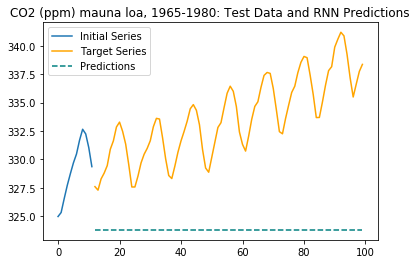

In [236]:
predict_and_plot (test_X_init, test_y, model, 'CO2 (ppm) mauna loa, 1965-1980: Test Data and RNN Predictions')

In [229]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    model = Sequential()
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=5, verbose=1)
    return model

In [230]:
model_1 = fit_LSTM(train_X, train_y, cell_units=100, epochs=3000)

Epoch 1/3000
16/16 [==============================] - 1s 2ms/step - loss: 105070.9568
Epoch 2/3000
16/16 [==============================] - 0s 2ms/step - loss: 104646.7477
Epoch 3/3000
16/16 [==============================] - 0s 2ms/step - loss: 103889.6526
Epoch 4/3000
16/16 [==============================] - 0s 2ms/step - loss: 103146.4288
Epoch 5/3000
16/16 [==============================] - 0s 2ms/step - loss: 102491.6144
Epoch 6/3000
16/16 [==============================] - 0s 4ms/step - loss: 101639.8672
Epoch 7/3000
16/16 [==============================] - 0s 2ms/step - loss: 101414.6976
Epoch 8/3000
16/16 [==============================] - 0s 2ms/step - loss: 101074.5694
Epoch 9/3000
16/16 [==============================] - 0s 2ms/step - loss: 100739.1337
Epoch 10/3000
16/16 [==============================] - 0s 2ms/step - loss: 100051.4462
Epoch 11/3000
16/16 [==============================] - 0s 2ms/step - loss: 100232.1135
Epoch 12/3000
16/16 [==============================]

16/16 [==============================] - 0s 2ms/step - loss: 51097.7638
Epoch 190/3000
16/16 [==============================] - 0s 2ms/step - loss: 50712.4894
Epoch 191/3000
16/16 [==============================] - 0s 2ms/step - loss: 50620.4791
Epoch 192/3000
16/16 [==============================] - 0s 2ms/step - loss: 50527.9398
Epoch 193/3000
16/16 [==============================] - 0s 4ms/step - loss: 50399.2424
Epoch 194/3000
16/16 [==============================] - 0s 2ms/step - loss: 49901.1131
Epoch 195/3000
16/16 [==============================] - 0s 2ms/step - loss: 49716.8647
Epoch 196/3000
16/16 [==============================] - 0s 2ms/step - loss: 49545.1790
Epoch 197/3000
16/16 [==============================] - 0s 2ms/step - loss: 49411.6477
Epoch 198/3000
16/16 [==============================] - 0s 2ms/step - loss: 49117.7824
Epoch 199/3000
16/16 [==============================] - 0s 2ms/step - loss: 48586.9474
Epoch 200/3000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 2ms/step - loss: 31789.7001
Epoch 284/3000
16/16 [==============================] - 0s 2ms/step - loss: 31700.7254
Epoch 285/3000
16/16 [==============================] - 0s 2ms/step - loss: 31635.6338
Epoch 286/3000
16/16 [==============================] - 0s 2ms/step - loss: 31298.8783
Epoch 287/3000
16/16 [==============================] - 0s 2ms/step - loss: 31272.3744
Epoch 288/3000
16/16 [==============================] - 0s 2ms/step - loss: 30939.1256
Epoch 289/3000
16/16 [==============================] - 0s 2ms/step - loss: 30633.0478
Epoch 290/3000
16/16 [==============================] - 0s 2ms/step - loss: 30787.8583
Epoch 291/3000
16/16 [==============================] - 0s 2ms/step - loss: 30514.6131
Epoch 292/3000
16/16 [==============================] - 0s 2ms/step - loss: 30339.3326
Epoch 293/3000
16/16 [==============================] - 0s 2ms/step - loss: 30279.6234
Epoch 294/3000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 2ms/step - loss: 8687.7437
Epoch 472/3000
16/16 [==============================] - 0s 2ms/step - loss: 8526.4036
Epoch 473/3000
16/16 [==============================] - 0s 2ms/step - loss: 8525.6702
Epoch 474/3000
16/16 [==============================] - 0s 2ms/step - loss: 8431.9395
Epoch 475/3000
16/16 [==============================] - 0s 2ms/step - loss: 8315.9769
Epoch 476/3000
16/16 [==============================] - 0s 2ms/step - loss: 8271.6089
Epoch 477/3000
16/16 [==============================] - 0s 2ms/step - loss: 8179.8984
Epoch 478/3000
16/16 [==============================] - 0s 2ms/step - loss: 8099.1036
Epoch 479/3000
16/16 [==============================] - 0s 2ms/step - loss: 8012.0450
Epoch 480/3000
16/16 [==============================] - 0s 2ms/step - loss: 7993.5031
Epoch 481/3000
16/16 [==============================] - 0s 2ms/step - loss: 7986.4368
Epoch 482/3000
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 2ms/step - loss: 660.7285
Epoch 662/3000
16/16 [==============================] - 0s 2ms/step - loss: 609.0862
Epoch 663/3000
16/16 [==============================] - 0s 2ms/step - loss: 612.3470
Epoch 664/3000
16/16 [==============================] - 0s 2ms/step - loss: 583.7711
Epoch 665/3000
16/16 [==============================] - 0s 2ms/step - loss: 607.1015
Epoch 666/3000
16/16 [==============================] - 0s 2ms/step - loss: 572.5949
Epoch 667/3000
16/16 [==============================] - 0s 2ms/step - loss: 552.8323
Epoch 668/3000
16/16 [==============================] - 0s 2ms/step - loss: 545.7947
Epoch 669/3000
16/16 [==============================] - 0s 2ms/step - loss: 537.0165
Epoch 670/3000
16/16 [==============================] - 0s 2ms/step - loss: 507.8087
Epoch 671/3000
16/16 [==============================] - 0s 2ms/step - loss: 498.5729
Epoch 672/3000
16/16 [==============================] - 0s 2ms/step - loss: 498.

16/16 [==============================] - 0s 2ms/step - loss: 8.8993
Epoch 855/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.4313
Epoch 856/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.1720
Epoch 857/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.1683
Epoch 858/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.3386
Epoch 859/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.1596
Epoch 860/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7137
Epoch 861/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.8463
Epoch 862/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.3722
Epoch 863/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.1052
Epoch 864/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.5661
Epoch 865/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5783
Epoch 866/3000


16/16 [==============================] - 0s 2ms/step - loss: 9.5404
Epoch 1051/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.1597
Epoch 1052/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.4940
Epoch 1053/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.0042
Epoch 1054/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2359
Epoch 1055/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.2633
Epoch 1056/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.6128
Epoch 1057/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3170
Epoch 1058/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.5484
Epoch 1059/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.6176
Epoch 1060/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.2880
Epoch 1061/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.9022
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 8.5700
Epoch 1245/3000
16/16 [==============================] - 0s 2ms/step - loss: 7.5901
Epoch 1246/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.4728
Epoch 1247/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.6481
Epoch 1248/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.1794
Epoch 1249/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8258
Epoch 1250/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.8684
Epoch 1251/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5415
Epoch 1252/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7681
Epoch 1253/3000
16/16 [==============================] - 0s 2ms/step - loss: 6.8594
Epoch 1254/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.3801
Epoch 1255/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7827
Epoch 1

16/16 [==============================] - 0s 2ms/step - loss: 8.9684
Epoch 1439/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.3222
Epoch 1440/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.0461
Epoch 1441/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.3320
Epoch 1442/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.1553
Epoch 1443/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.3758
Epoch 1444/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8391
Epoch 1445/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.6267
Epoch 1446/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.3158
Epoch 1447/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.2441
Epoch 1448/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.7188
Epoch 1449/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2212
Ep

16/16 [==============================] - 0s 2ms/step - loss: 9.9592
Epoch 1536/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3069
Epoch 1537/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2637
Epoch 1538/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5860
Epoch 1539/3000
16/16 [==============================] - 0s 2ms/step - loss: 7.4303
Epoch 1540/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5855
Epoch 1541/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.1996
Epoch 1542/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.5237
Epoch 1543/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.1169
Epoch 1544/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.2142
Epoch 1545/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.1321
Epoch 1546/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.0054
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 9.6144
Epoch 1730/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.5347
Epoch 1731/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.9441
Epoch 1732/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8373
Epoch 1733/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.3105
Epoch 1734/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.9566
Epoch 1735/3000
16/16 [==============================] - 0s 2ms/step - loss: 7.9408
Epoch 1736/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7110
Epoch 1737/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.4679
Epoch 1738/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.0062
Epoch 1739/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7120
Epoch 1740/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.9342
Epoch 1

16/16 [==============================] - 0s 2ms/step - loss: 10.0902
Epoch 1924/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3265
Epoch 1925/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.6839
Epoch 1926/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.5210
Epoch 1927/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.8277
Epoch 1928/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.7693
Epoch 1929/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2024
Epoch 1930/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.8666
Epoch 1931/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.7759
Epoch 1932/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.0047
Epoch 1933/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.9382
Epoch 1934/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.0629
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 8.2266
Epoch 2118/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.6922
Epoch 2119/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.9058
Epoch 2120/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.9444
Epoch 2121/3000
16/16 [==============================] - 0s 2ms/step - loss: 11.5504
Epoch 2122/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.0753
Epoch 2123/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.3397
Epoch 2124/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.7949
Epoch 2125/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.0102
Epoch 2126/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7498
Epoch 2127/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.0359
Epoch 2128/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.5048
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 8.6096
Epoch 2312/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5235
Epoch 2313/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5702
Epoch 2314/3000
16/16 [==============================] - 0s 2ms/step - loss: 7.2080
Epoch 2315/3000
16/16 [==============================] - 0s 2ms/step - loss: 7.6767
Epoch 2316/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7260
Epoch 2317/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2552
Epoch 2318/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.5695
Epoch 2319/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3294
Epoch 2320/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.9769
Epoch 2321/3000
16/16 [==============================] - 0s 2ms/step - loss: 11.6836
Epoch 2322/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3891
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 9.5640
Epoch 2506/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.6034
Epoch 2507/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.8636
Epoch 2508/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.9054
Epoch 2509/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.6892
Epoch 2510/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.5016
Epoch 2511/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8952
Epoch 2512/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.5293
Epoch 2513/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.5283
Epoch 2514/3000
16/16 [==============================] - 0s 2ms/step - loss: 11.0917
Epoch 2515/3000
16/16 [==============================] - 0s 2ms/step - loss: 7.7729
Epoch 2516/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8449
Epoch

16/16 [==============================] - 0s 2ms/step - loss: 9.0987
Epoch 2700/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.8012
Epoch 2701/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2306
Epoch 2702/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8442
Epoch 2703/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.6912
Epoch 2704/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.3053
Epoch 2705/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3678
Epoch 2706/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.0347
Epoch 2707/3000
16/16 [==============================] - 0s 2ms/step - loss: 11.3715
Epoch 2708/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.1022
Epoch 2709/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.5454
Epoch 2710/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.6172
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 8.3247
Epoch 2893/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.6390
Epoch 2894/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.2875
Epoch 2895/3000
16/16 [==============================] - 0s 2ms/step - loss: 12.4932
Epoch 2896/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.7407
Epoch 2897/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7258
Epoch 2898/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.8967
Epoch 2899/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.3788
Epoch 2900/3000
16/16 [==============================] - 0s 2ms/step - loss: 8.7591
Epoch 2901/3000
16/16 [==============================] - 0s 2ms/step - loss: 9.4950
Epoch 2902/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.6256
Epoch 2903/3000
16/16 [==============================] - 0s 2ms/step - loss: 10.0152
Epoch

In [239]:
model_1.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 70)                20160     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


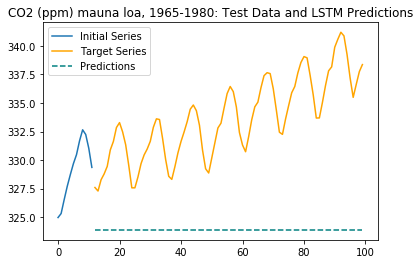

In [231]:
predict_and_plot (test_X_init, test_y, model_1, 'CO2 (ppm) mauna loa, 1965-1980: Test Data and LSTM Predictions')

C:\Users\WeiEn\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


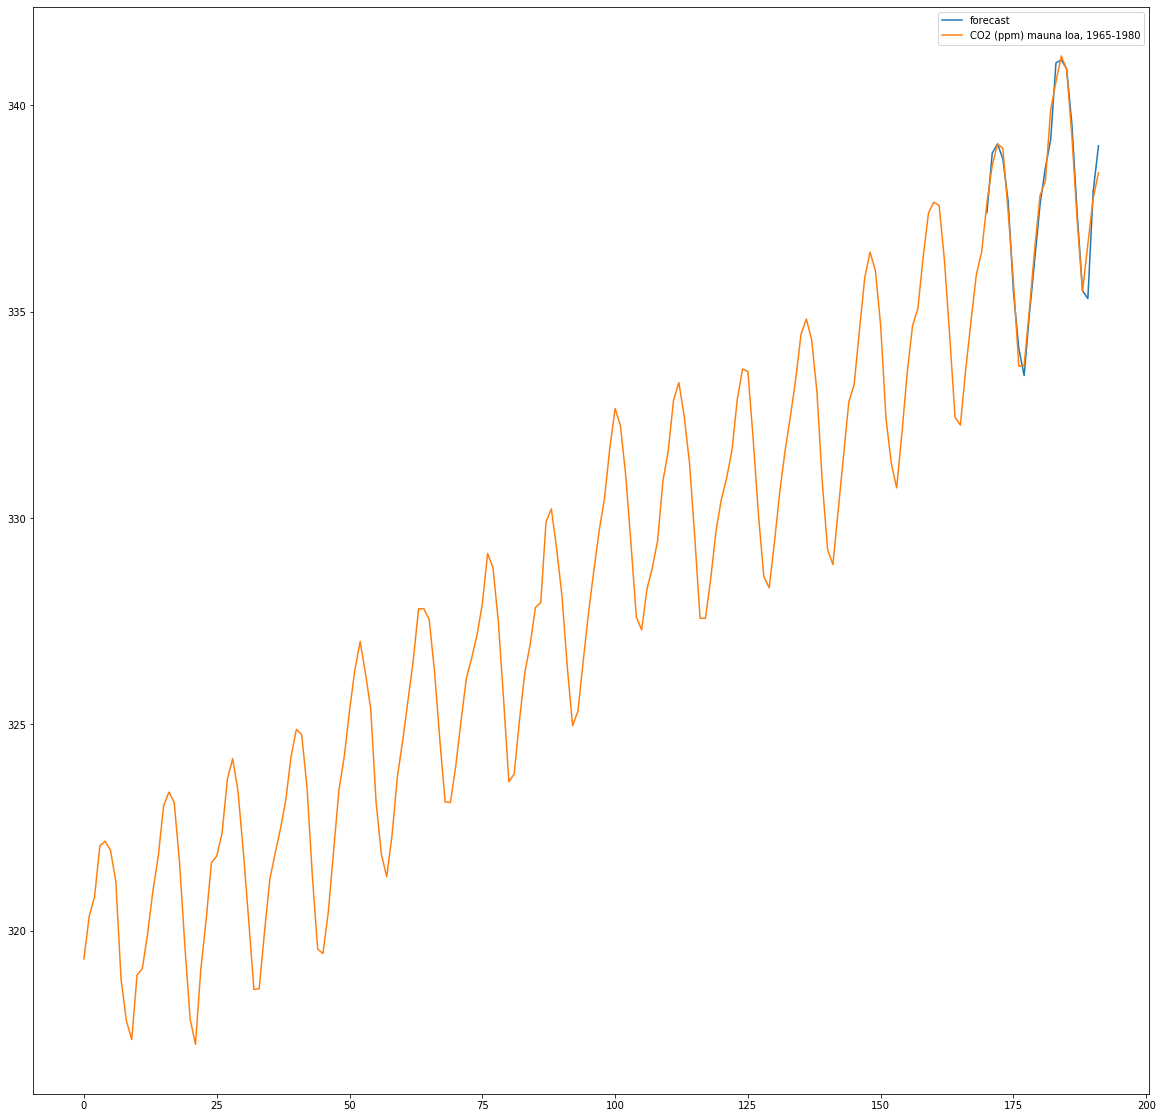

In [280]:
sar = sm.tsa.statespace.SARIMAX(df['CO2 (ppm) mauna loa, 1965-1980'],
                               order=(0,1,0),
                               seasonal_order=(0,1,1,12),
                               trend='c').fit()

pd.plotting.register_matplotlib_converters()

df['forecast'] = sar.predict(start=170, end=192)
df[['forecast','CO2 (ppm) mauna loa, 1965-1980']].plot()

fig = plt.gcf()
fig.set_size_inches(20,20)